In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

test_data= pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
train_data= pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.shape

(891, 12)

In [4]:
n_rows,n_columns=train_data.shape
print("rows:",n_rows)
print("columns:",n_columns)

rows: 891
columns: 12


In [5]:
print("The data types are")
train_data.dtypes

The data types are


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
missing_values=train_data.isnull().sum()
print("Missing values in dataset:")
missing_values

Missing values in dataset:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Drop irrelevant columns and handle missing values
test_data.drop(columns=['Cabin'], inplace=True)  # Dropping Cabin column
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)


In [9]:
train_data['Sex'].replace(to_replace = 'male', value = 0, inplace = True)
train_data['Sex'].replace(to_replace = 'female', value = 1, inplace = True)

In [10]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [11]:
test_data['Sex'].replace(to_replace = 'male', value = 0, inplace = True)
test_data['Sex'].replace(to_replace = 'female', value = 1, inplace = True)

In [12]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,S


<Figure size 1000x600 with 0 Axes>

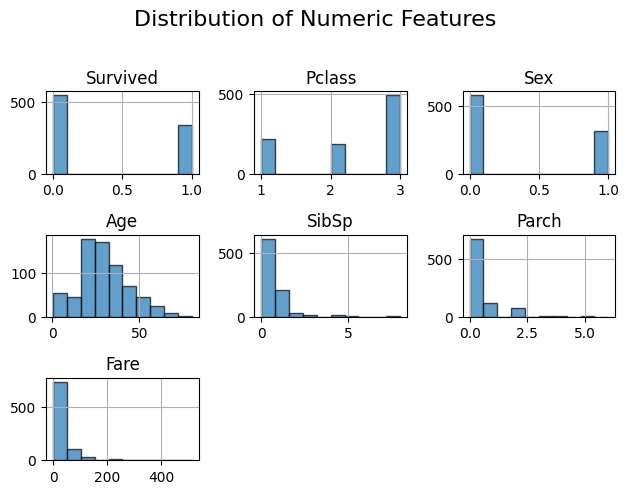

In [13]:
numeric_columns = ['Survived', 'Pclass', 'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
plt.figure(figsize=(10, 6))

train_data[numeric_columns].hist (edgecolor='black', alpha=0.7)
plt.suptitle("Distribution of Numeric Features", y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

#plt.figure(figsize=(10, 6))
#sns.boxplot (test_data=test_data [numeric_columns])
#plt.title("Box Plot of Numeric Features")
#plt.show()

In [14]:
#Categorical column
categorical_column = 'Sex'

#Calculate the frequency distribution
category_counts = train_data[categorical_column].value_counts()
print (category_counts)

0    577
1    314
Name: Sex, dtype: int64


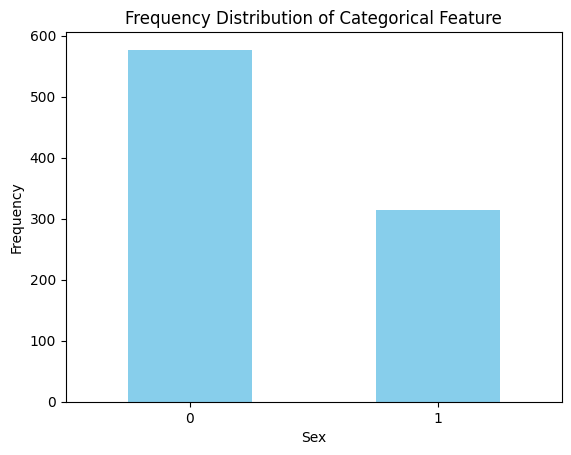

In [15]:
# Create a bar plot for the categorical feature
category_counts.plot (kind='bar', color='skyblue')
plt.title("Frequency Distribution of Categorical Feature")

plt.xlabel(categorical_column)

plt.ylabel("Frequency")
plt.xticks(rotation=0)

plt.show()

In [16]:
categorical_column='Sex'

#One-Hot Encoding (Creating Dummy Variables)
data_encoded_onehot = pd.get_dummies (train_data, columns=[categorical_column],prefix=[categorical_column])

# Display the first few rows of the encoded data

print ("One-Hot Encoded Data:")
print(data_encoded_onehot.head())

#Label Encoding

from sklearn.preprocessing import LabelEncoder

data_encoded_label = train_data.copy()
label_encoder=LabelEncoder()

data_encoded_label [categorical_column]=label_encoder.fit_transform(data_encoded_label [categorical_column])

One-Hot Encoded Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_0  Sex_1  
0         A/5 21171   7.2500   NaN        S      1      0  
1          PC 17599  71.2833   C85        C      0      1  
2  STON/O2. 3101282   7.9250   NaN        S      0      1  
3            113803  53.1000  C123        S      0      1  
4   

In [17]:
numeric_columns = ['Age', 'Fare', 'Pclass','Survived']

#Standardization
scaler_standard =StandardScaler()
data_standardized =pd.DataFrame(scaler_standard.fit_transform(train_data [numeric_columns]), columns=numeric_columns)

# Display the first few rows of the standardized data
print ("Standardized Data: ")
print (data_standardized. head())

# Normalization (MinMax Sealing)
scaler_minmax =MinMaxScaler()
data_normalized = pd.DataFrame (scaler_minmax.fit_transform(train_data [numeric_columns]), columns=numeric_columns)

# Display the first few rows of the normalized data
print("\nNormalized Data:")
print (data_normalized.head())

Standardized Data: 
        Age      Fare    Pclass  Survived
0 -0.530377 -0.502445  0.827377 -0.789272
1  0.571831  0.786845 -1.566107  1.266990
2 -0.254825 -0.488854  0.827377  1.266990
3  0.365167  0.420730 -1.566107  1.266990
4  0.365167 -0.486337  0.827377 -0.789272

Normalized Data:
        Age      Fare  Pclass  Survived
0  0.271174  0.014151     1.0       0.0
1  0.472229  0.139136     0.0       1.0
2  0.321438  0.015469     1.0       1.0
3  0.434531  0.103644     0.0       1.0
4  0.434531  0.015713     1.0       0.0


In [21]:
x_test = test_data[['Pclass', 'Sex', 'SibSp', 'Parch']].values

array([[3, 0, 1, 0],
       [1, 1, 1, 0],
       [3, 1, 0, 0],
       ...,
       [3, 1, 1, 2],
       [1, 0, 0, 0],
       [3, 0, 0, 0]])

In [22]:
x = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']].values
x

array([[3, 0, 1, 0],
       [1, 1, 1, 0],
       [3, 1, 0, 0],
       ...,
       [3, 1, 1, 2],
       [1, 0, 0, 0],
       [3, 0, 0, 0]])

In [24]:
y = train_data.iloc[:, 1:2].values

In [25]:
model = LogisticRegression(max_iter = 183)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=183)

In [26]:
y_pred = model.predict(x_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [27]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
